In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings; warnings.filterwarnings(action='once')

# set the  fontsize and some other elements
large = 22; med = 16; small = 12
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (16, 10),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}
plt.rcParams.update(params)
plt.style.use('seaborn-whitegrid')
sns.set_style("white")
%matplotlib inline

In [31]:
# Import dataset 
info_table = pd.read_csv('info_table.csv')

# Prepare Data 
# Create as many colors as there are unique midwest['category']

#categories = np.unique(midwest['category'])
#colors = [plt.cm.tab10(i/float(len(categories)-1)) for i in range(len(categories))]

# Draw Plot for Each Category
def getMeanLen(left,interval):
    need = info_table[(info_table['averge_content']>=left) & (info_table['averge_content']<(left+interval))]
    ret = 0
    if(need.index.size!=0):
        ret = need['len'].sum()/need.index.size
    return ret
content_seq = np.linspace(0,15,301)
interval = content_seq[1]-content_seq[0]
mean_len_seq = []
for left in content_seq:
    mean_len_seq.append(getMeanLen(left,interval))

No handles with labels found to put in legend.


<Figure size 1280x800 with 0 Axes>

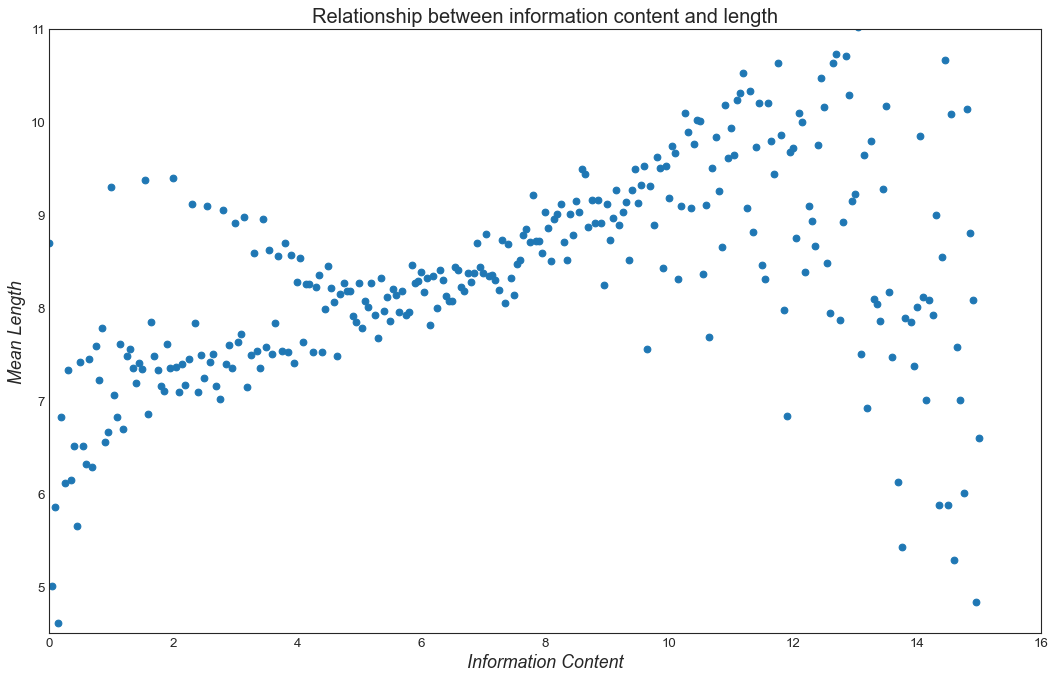

In [32]:
plt.figure(figsize=(16, 10), dpi= 80, facecolor='w', edgecolor='k')
plt.figure(figsize=(16, 10), dpi= 80, facecolor='w', edgecolor='k')
plt.scatter(content_seq,mean_len_seq)
plt.gca().set(xlim=(0, 16), ylim=(4.5, 11),xlabel='Area', ylabel='Population')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Information Content', fontsize=16, loc="center", fontstyle='italic')
plt.ylabel('Mean Length', fontsize=16, loc="center", fontstyle='italic')
plt.title("Relationship between information content and length", fontsize=18)
plt.legend(fontsize=12)    
plt.show()    

In [30]:
plt.savefig('./IMDB_30000_ori.svg', format='svg')

<Figure size 432x288 with 0 Axes>